<a href="https://colab.research.google.com/github/sanjayyanadi/EDA-Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

### **EXPLORATORY DATA ANALYSIS**







In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [4]:
# importing csv file to google colab using drive
from google.colab import drive
drive.mount('/content/drive/')
path='/content/drive/MyDrive/ALMABETTER/CAPSTONE_PROJECT/EDA_PROJECT/Telecom Churn.csv'
df = pd.read_csv(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# basic structure of telecom dataset
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [ ]:
#information of dataset by data and its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# describing data set by its count,mean,max,min so.on,.
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [ ]:
# shape or size of dataset with respect to row and column
print ("\n number of Rows in dataset : " ,df.shape[0])
print ("\n number of Columns in dataset : " ,df.shape[1])


 number of Rows in dataset :  3333

 number of Columns in dataset :  20


In [ ]:
# features of dataset
print (" Features : \n" ,df.columns.T)

 Features : 
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [ ]:
#unique data in dataset
print ("\n Unique values :  \n",df.nunique())


 Unique values :  
 State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


## **FEATURES:**

**STATE:** 51 Unique States in United States of America

**Account Length:** unique id

**Area Code:** represents perticular area by its code

**International Plan:**Indicates subscription for Internatinal Plan

**Voice Mail Plan:** Indicates subscription for Voice Mail Plan

**Number vmail messages:** Number of Voice Mail Messages

**Total day minutes:** Total Number of Minutes Spent By Customers in Morning

**Total day calls:** Total Number of Calls made by Customer in Morning.

**Total day charge:** Total Charge to the Customers in Morning.

**Total eve minutes:**  Total Number of Minutes Spent By Customers in Evening

**Total eve calls:** Total Number of Calls made by Customer in Evening.

**Total eve charge:** Total Charge to the Customers in Morning.

**Total night minutes:** Total Number of Minutes Spent By Customers in the Night.

**Total night calls:** Total Number of Calls made by Customer in Night.

**Total night charge:** Total Charge to the Customers in Night.

**Total intl minutes:** Total Number of Minutes Spent By Customers in the International call.

**Total intl calls:** Total Number of Calls made by Customer in International call.

**Total intl charge:** Total Charge to the Customers in International call.

**Churn:** Canceleation of subcription.

In [ ]:
#checking for null or empy values 
print ("Missing values in dataset :  ", df.isnull().sum())

Missing values in dataset :   State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


## By above data we can conclude that the data doesn't have null/empty data, we can further proceed for analysis.
### case 1: if we have null/empty data we need to fill or delete respective data(w.r.t rows and columns) **bold text**

In [ ]:
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6            

In [ ]:
# adding new data by converting all day,evening,night data into one data w.r.t. calls, minutes, charge 
df['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']
df['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

In [ ]:
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  ...  Total night calls  \
0                45.07              197.4  ...                 91   
1                27.47              195.5  ...                103   
2                41.38              121.2  ...                104   
3                50.90               61.9  ...                 89   
4                28.34              148.3  ...                121   
...                ...                ...  ...                ...   
3328             26.55              215.5  ...                 83   
3329             39.29              153.4  ...                123   
3330             30.74              288.8  ...                 91   
3331             36.35              159.6  ...                137   
3332             39.85              265.9  ...                 77   

      Total night charge  Total intl minutes  Total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      Total intl charge  Customer service calls  Churn  Total minutes  \
0                  2.70                       1  False          707.2   
1                  3.70                       1  False          611.5   
2                  3.29                       0  False          527.2   
3                  1.78                       2  False          558.2   
4                  2.73                       3  False          501.9   
...                 ...                     ...    ...            ...   
3328               2.67                       2  False          650.8   
3329               2.59                       3  False          575.8   
3330    

In [ ]:
# from above table we are dropping the account_lenght as it not useful/required for this analysis
df.drop(['Account length'],axis=1,inplace=True)

In [ ]:
df

State  Area code International plan Voice mail plan  \
0       KS        415                 No             Yes   
1       OH        415                 No             Yes   
2       NJ        415                 No              No   
3       OH        408                Yes              No   
4       OK        415                Yes              No   
...    ...        ...                ...             ...   
3328    AZ        415                 No             Yes   
3329    WV        415                 No              No   
3330    RI        510                 No              No   
3331    CT        510                Yes              No   
3332    TN        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  ...  \
0                45.07              197.4               99  ...   
1                27.47              195.5              103  ...   
2                41.38              121.2              110  ...   
3                50.90               61.9               88  ...   
4                28.34              148.3              122  ...   
...                ...                ...              ...  ...   
3328             26.55              215.5              126  ...   
3329             39.29              153.4               55  ...   
3330             30.74              288.8               58  ...   
3331             36.35              159.6               84  ...   
3332             39.85              265.9               82  ...   

      Total night calls  Total night charge  Total intl minutes  \
0                    91               11.01                10.0   
1                   103               11.45                13.7   
2                   104                7.32                12.2   
3                    89                8.86                 6.6   
4                   121                8.41                10.1   
...                 ...                 ...                 ...   
3328                 83               12.56                 9.9   
3329                123                8.61                 9.6   
3330                 91                8.64                14.1   
3331                137                6.26                 5.0   
3332                 77               10.86                13.7   

      Total intl calls  Total intl charge  Customer service calls  Churn  \
0                    3               2.70                       1  False   
1                    3               3.70                       1  False   
2                    5               3.29                       0  False   
3                    7               1.78                       2  False   
4                    3               2.73                       3  False   
...                ...                ...                     ...    ...   
3328                 6               2.67                       2  False   
3329                 4               2.59                       3  False   
3330                 6               3.81                       2  False   
3331                10               1.35                       2  False   
3332                 4           

False    2850
True      483
Name: Churn, dtype: int64
False    0.855086
True     0.144914
Name: Churn, dtype: float64


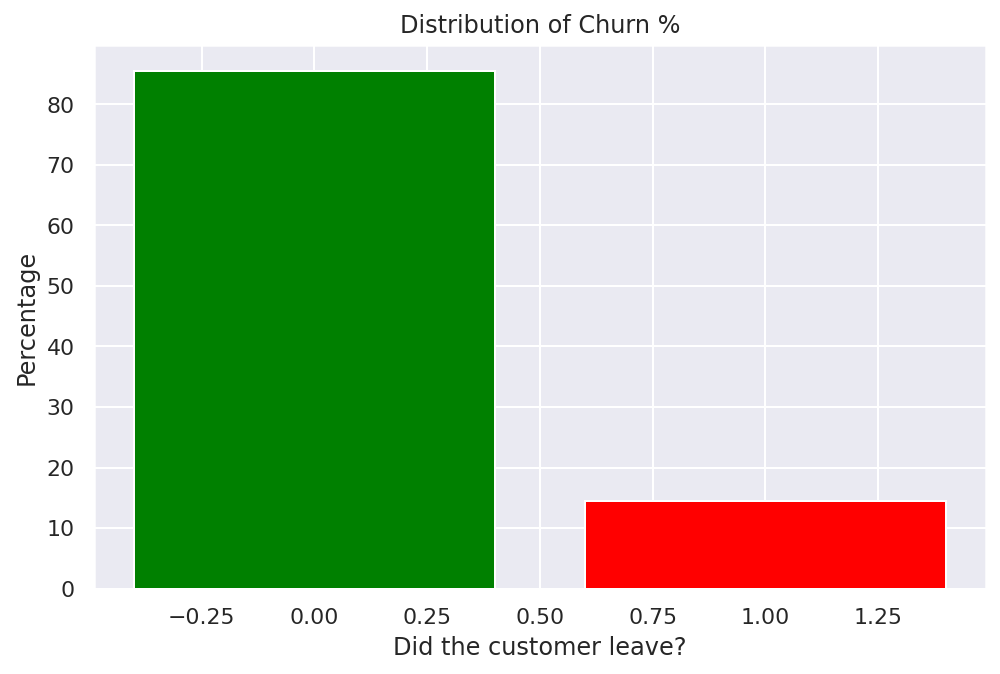

In [ ]:
# churn rate
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True))
fig, axes = plt.subplots(figsize=(8,5))
data = df["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

From Above graphs represents that 14.5% people are cancelled their the subcription.
almost 483 accounts cancelled their subcription and this may effects the company and this can lead to huge loss for company


yet to find the reasons


State
WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


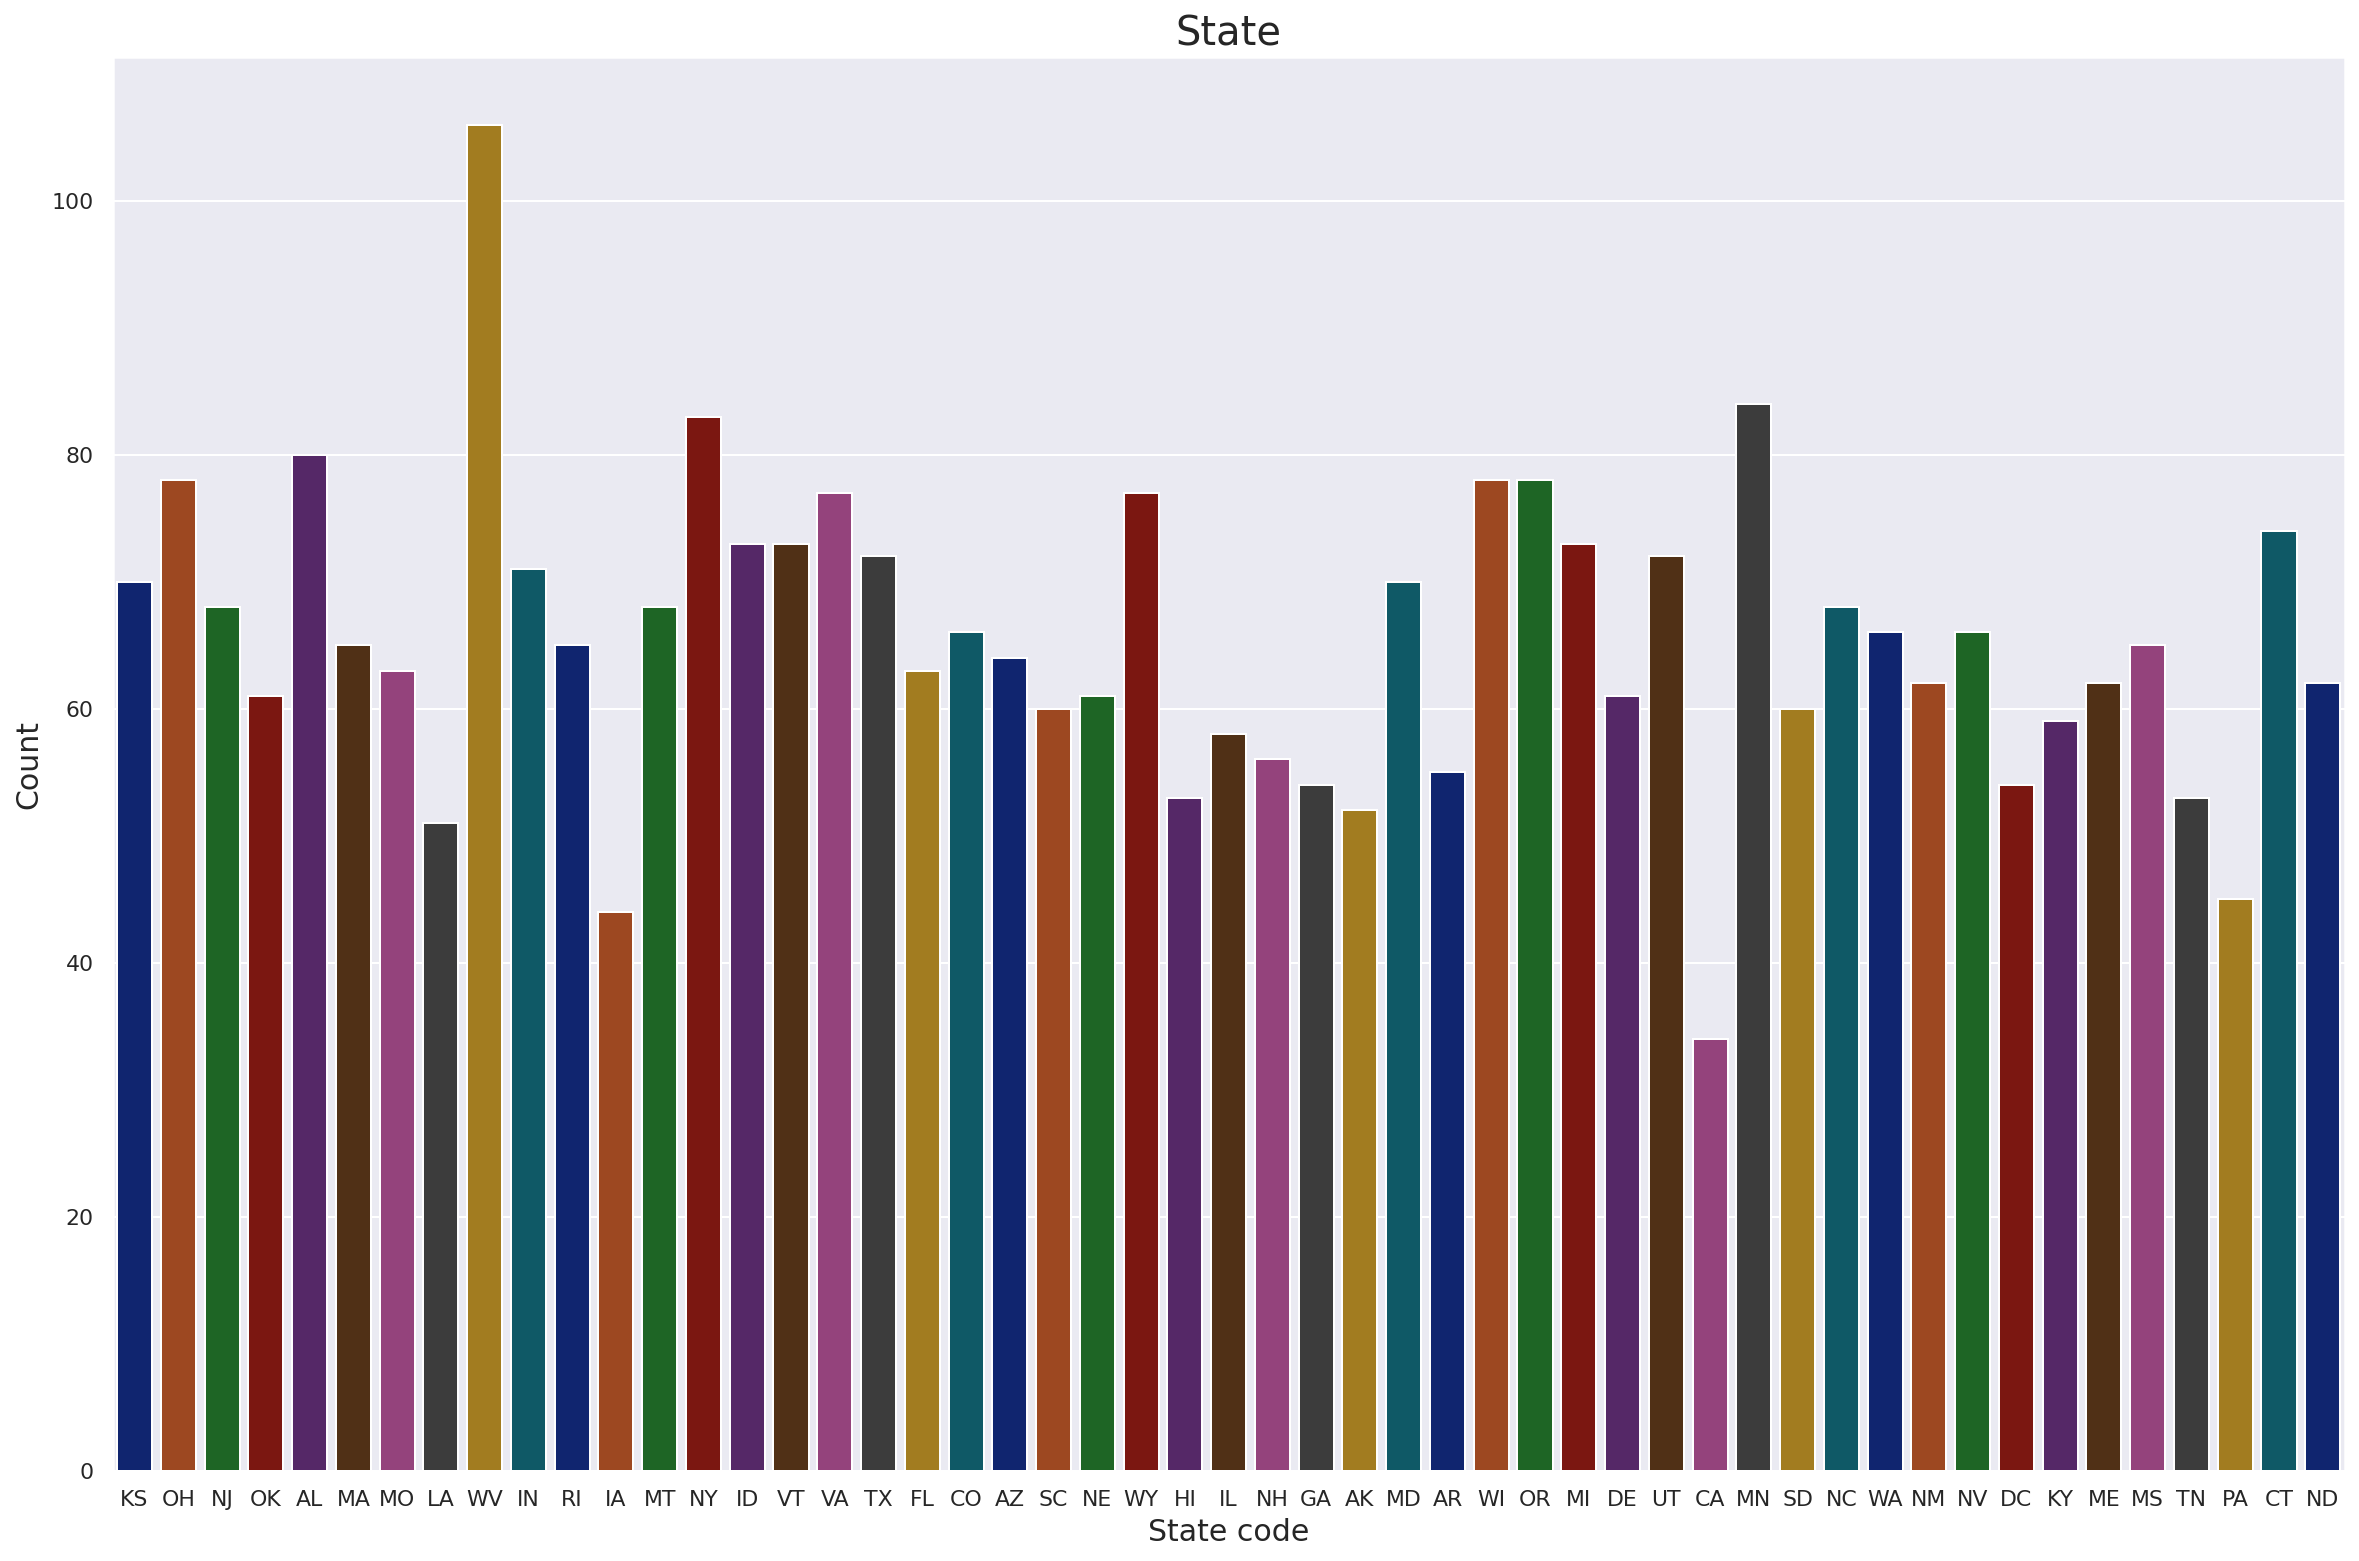

In [ ]:
# district
# top districts of states thet uses telecom most often
print(df.value_counts("State").head(10))
plt.figure(figsize=(20,13))
sns.countplot(df["State"],palette = "dark")
plt.title("State",fontsize=20)
plt.xlabel("State code",fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
# telecom disrtibution to ditrict with respect to churn 
print(pd.crosstab(df["State"], df['Churn']))
plt.figure(figsize=(15,10))
sns.countplot(x = 'State', data = df, hue = 'Churn')
plt.xlabel("State code",fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Churn Distribution Across the States', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show()

Area code
415    1655
510     840
408     838
dtype: int64
Churn      False  True
Area code             
408          716   122
415         1419   236
510          715   125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


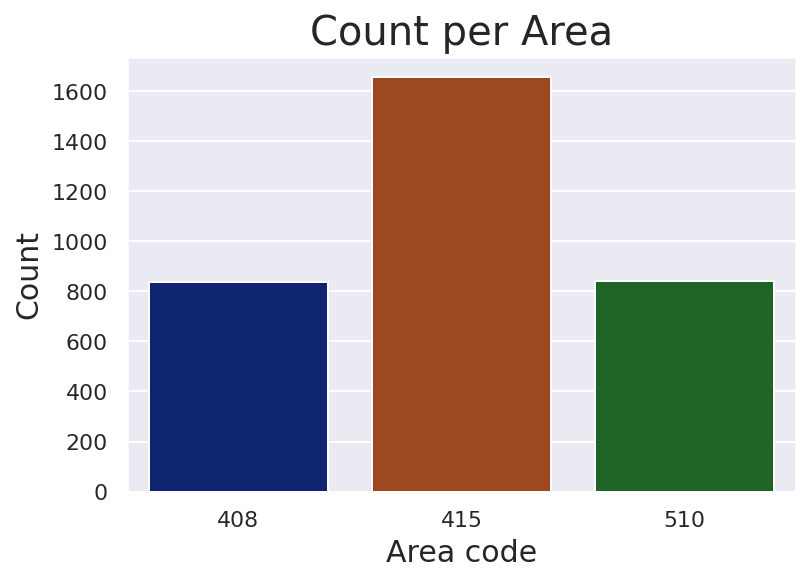

In [ ]:
# area code
# maximum usage of telecom with respect to area code
print(df.value_counts("Area code"))
sns.countplot(df["Area code"],palette = "dark")
plt.title("Count per Area",fontsize=20)
plt.xlabel("Area code",fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Churn      False  True
Area code             
408          716   122
415         1419   236
510          715   125


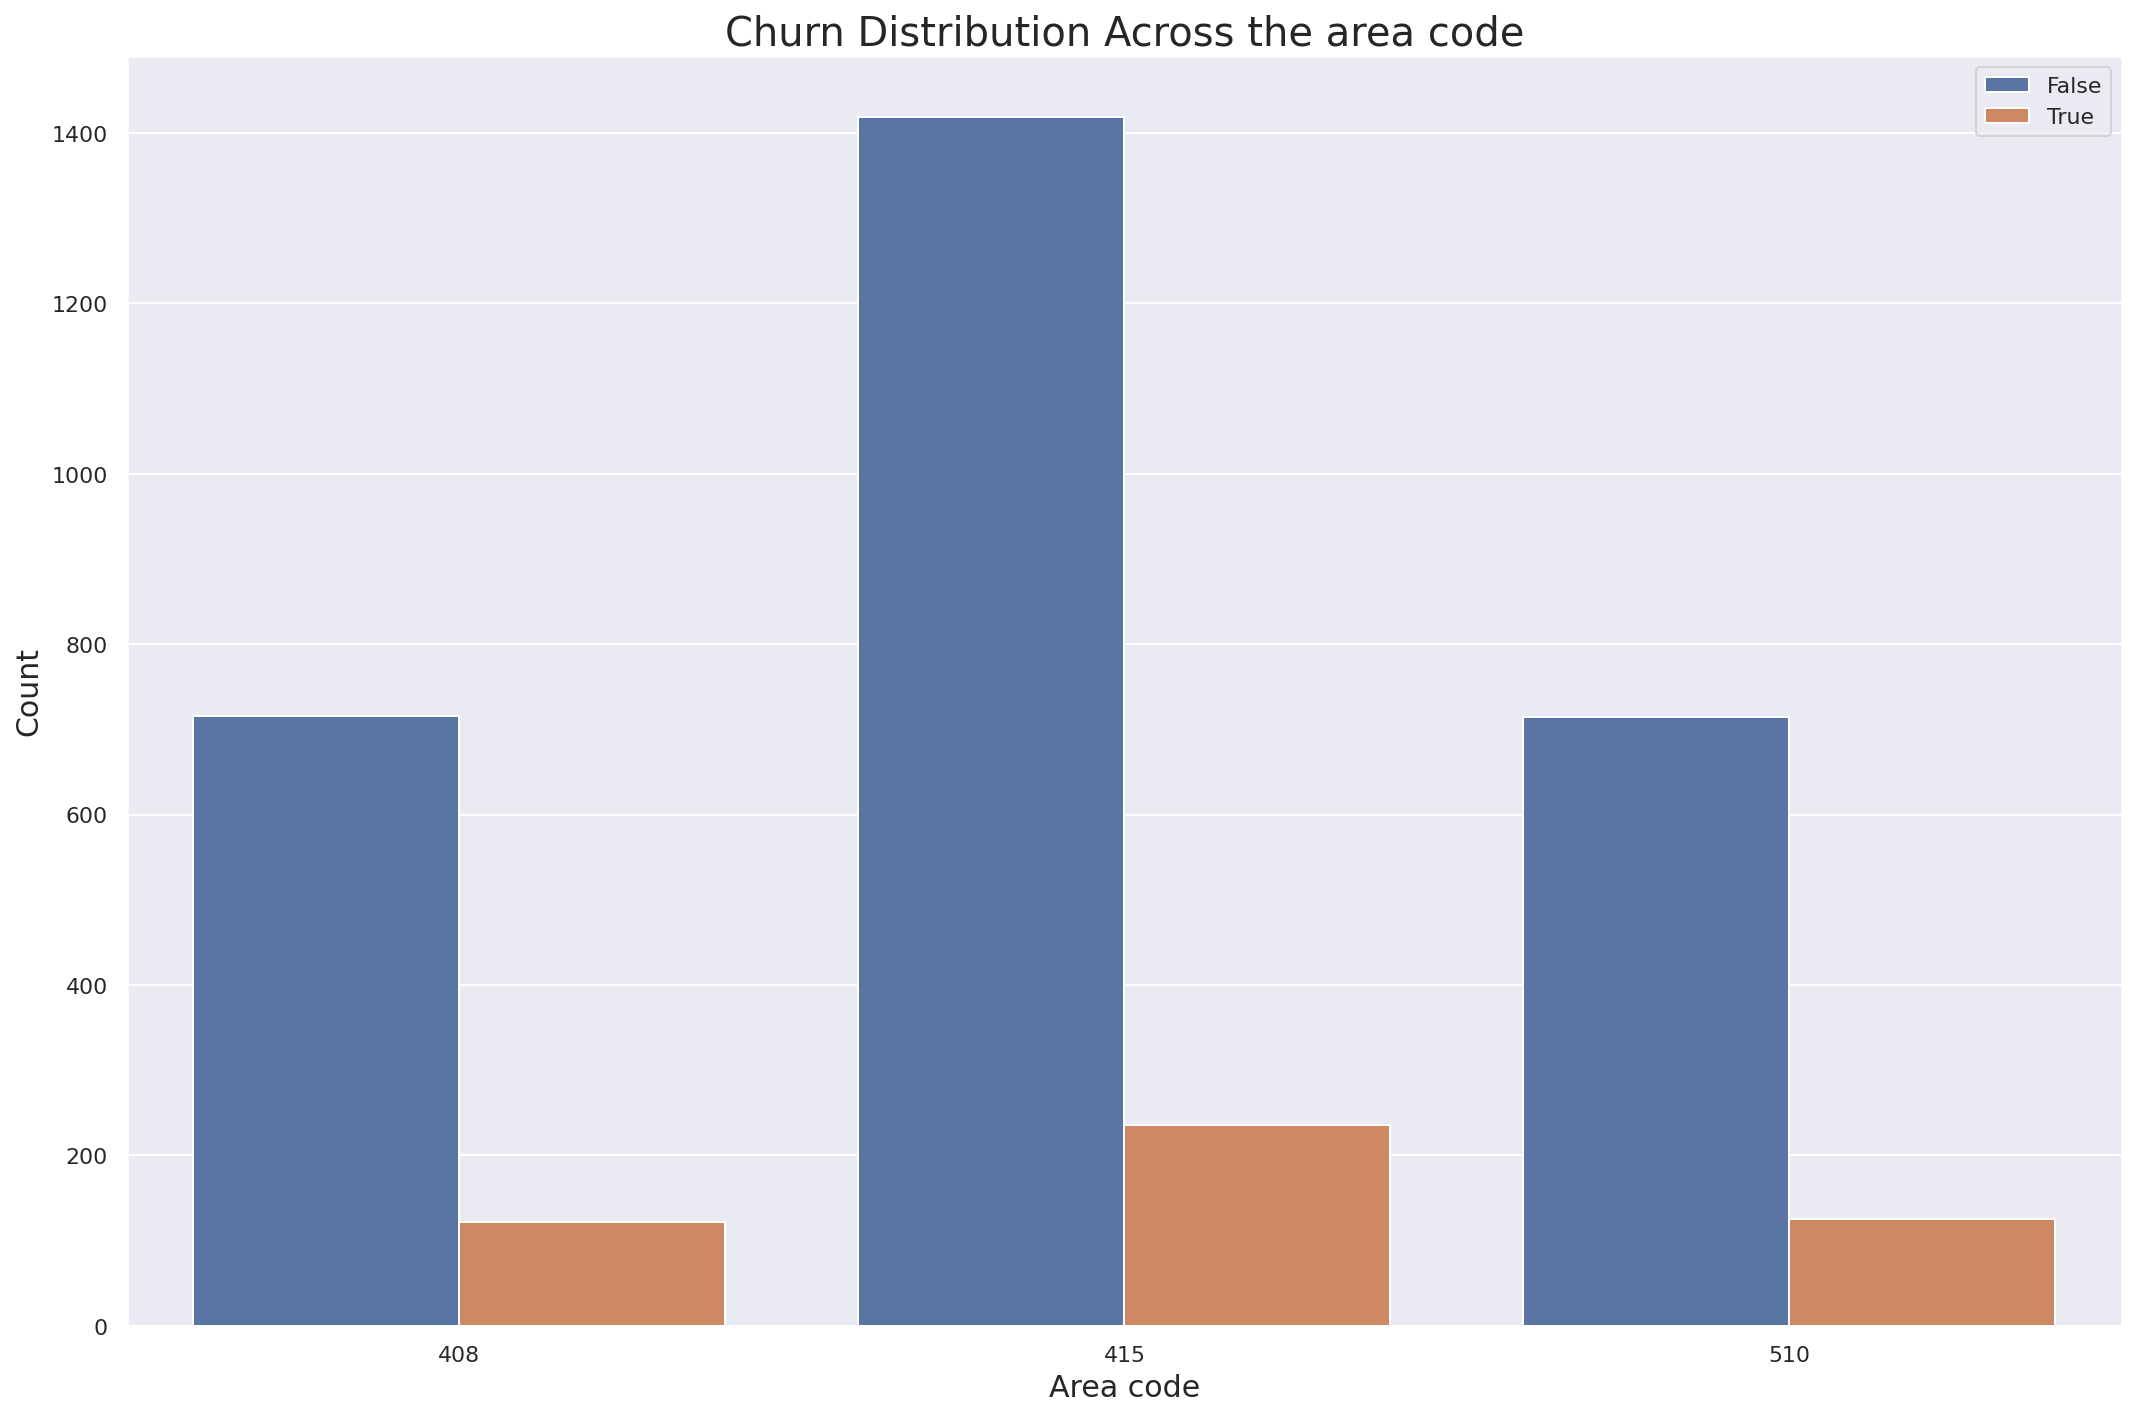

In [ ]:
# churn disstribution with respect to area code
print(pd.crosstab(df["Area code"], df['Churn']))
plt.figure(figsize=(15,10))
sns.countplot(x = 'Area code', data = df, hue = 'Churn')
plt.xlabel("Area code",fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Churn Distribution Across the area code', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show()

by above to two data we can observe

majority telecom is being served in area code 415, which is double the other two areas,

churn is equally distributed with respect to the area code

we dont see any variations in area code for churn distribution.






International plan
No     3010
Yes     323
dtype: int64
Churn               False  True
International plan             
No                   2664   346
Yes                   186   137


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


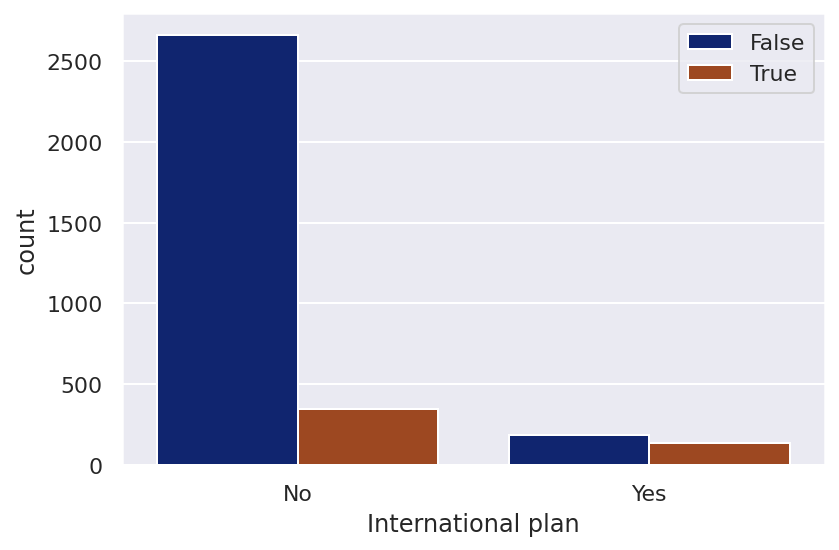

In [ ]:
# distribution international plan with respect to churn
print(df.value_counts("International plan"))
print(pd.crosstab(df['International plan'], df['Churn']))
sns.countplot(df["International plan"], hue=df["Churn"], palette = "dark")
plt.legend()
plt.tight_layout()
plt.show()

Voice mail plan
No     2411
Yes     922
dtype: int64
Churn            False  True
Voice mail plan             
No                2008   403
Yes                842    80


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


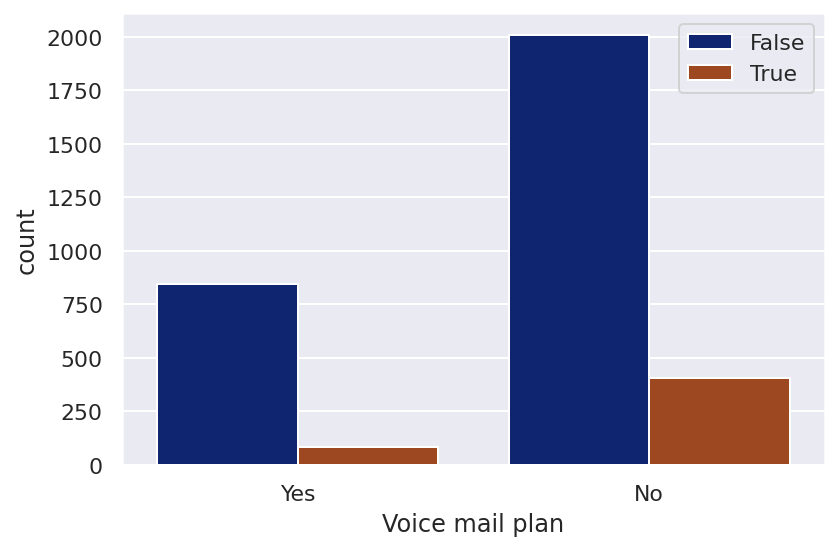

In [ ]:
# distribution voice plan with respect to churn
print(df.value_counts("Voice mail plan"))
print(pd.crosstab(df["Voice mail plan"], df['Churn']))
sns.countplot(df["Voice mail plan"], hue=df["Churn"], palette = "dark")
plt.legend()
plt.tight_layout()
plt.show()

By above data from international and voice mail plan with respect to churns


1.   international plan stands 137 churns
2.   voice mail plan stands 80 churns

we can conclude that the most churn(conceletion of subcription) comes from the International plan.

State	Account length	Area code	International plan	Voice mail plan	Number vmail messages	Total day minutes	

Total day calls	Total day charge	Total eve minutes	...	Total night calls	Total night charge	Total intl minutes	Total intl calls	Total intl charge	Customer service calls	Churn	Total calls	Total minutes	Total charge

In [ ]:
# maximum values of dataset w.r.t columns 
df.apply(np.max)

State                        WY
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
Total minutes             885.0
Total charge              96.15
dtype: object

In [ ]:
# creating the list of features to explore more data in terms of visualization
num_var = list(df.select_dtypes(exclude = ['object', 'bool']).columns)
unwanted_num_var = ['Account length','Area code','International plan','Voice mail plan','Number vmail messages', 'Customer service calls','Churn']
# list comprehension
num_var= [i for i in num_var if i not in unwanted_num_var ]

In [ ]:
num_var

['Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Total minutes',
 'Total calls',
 'Total charge']

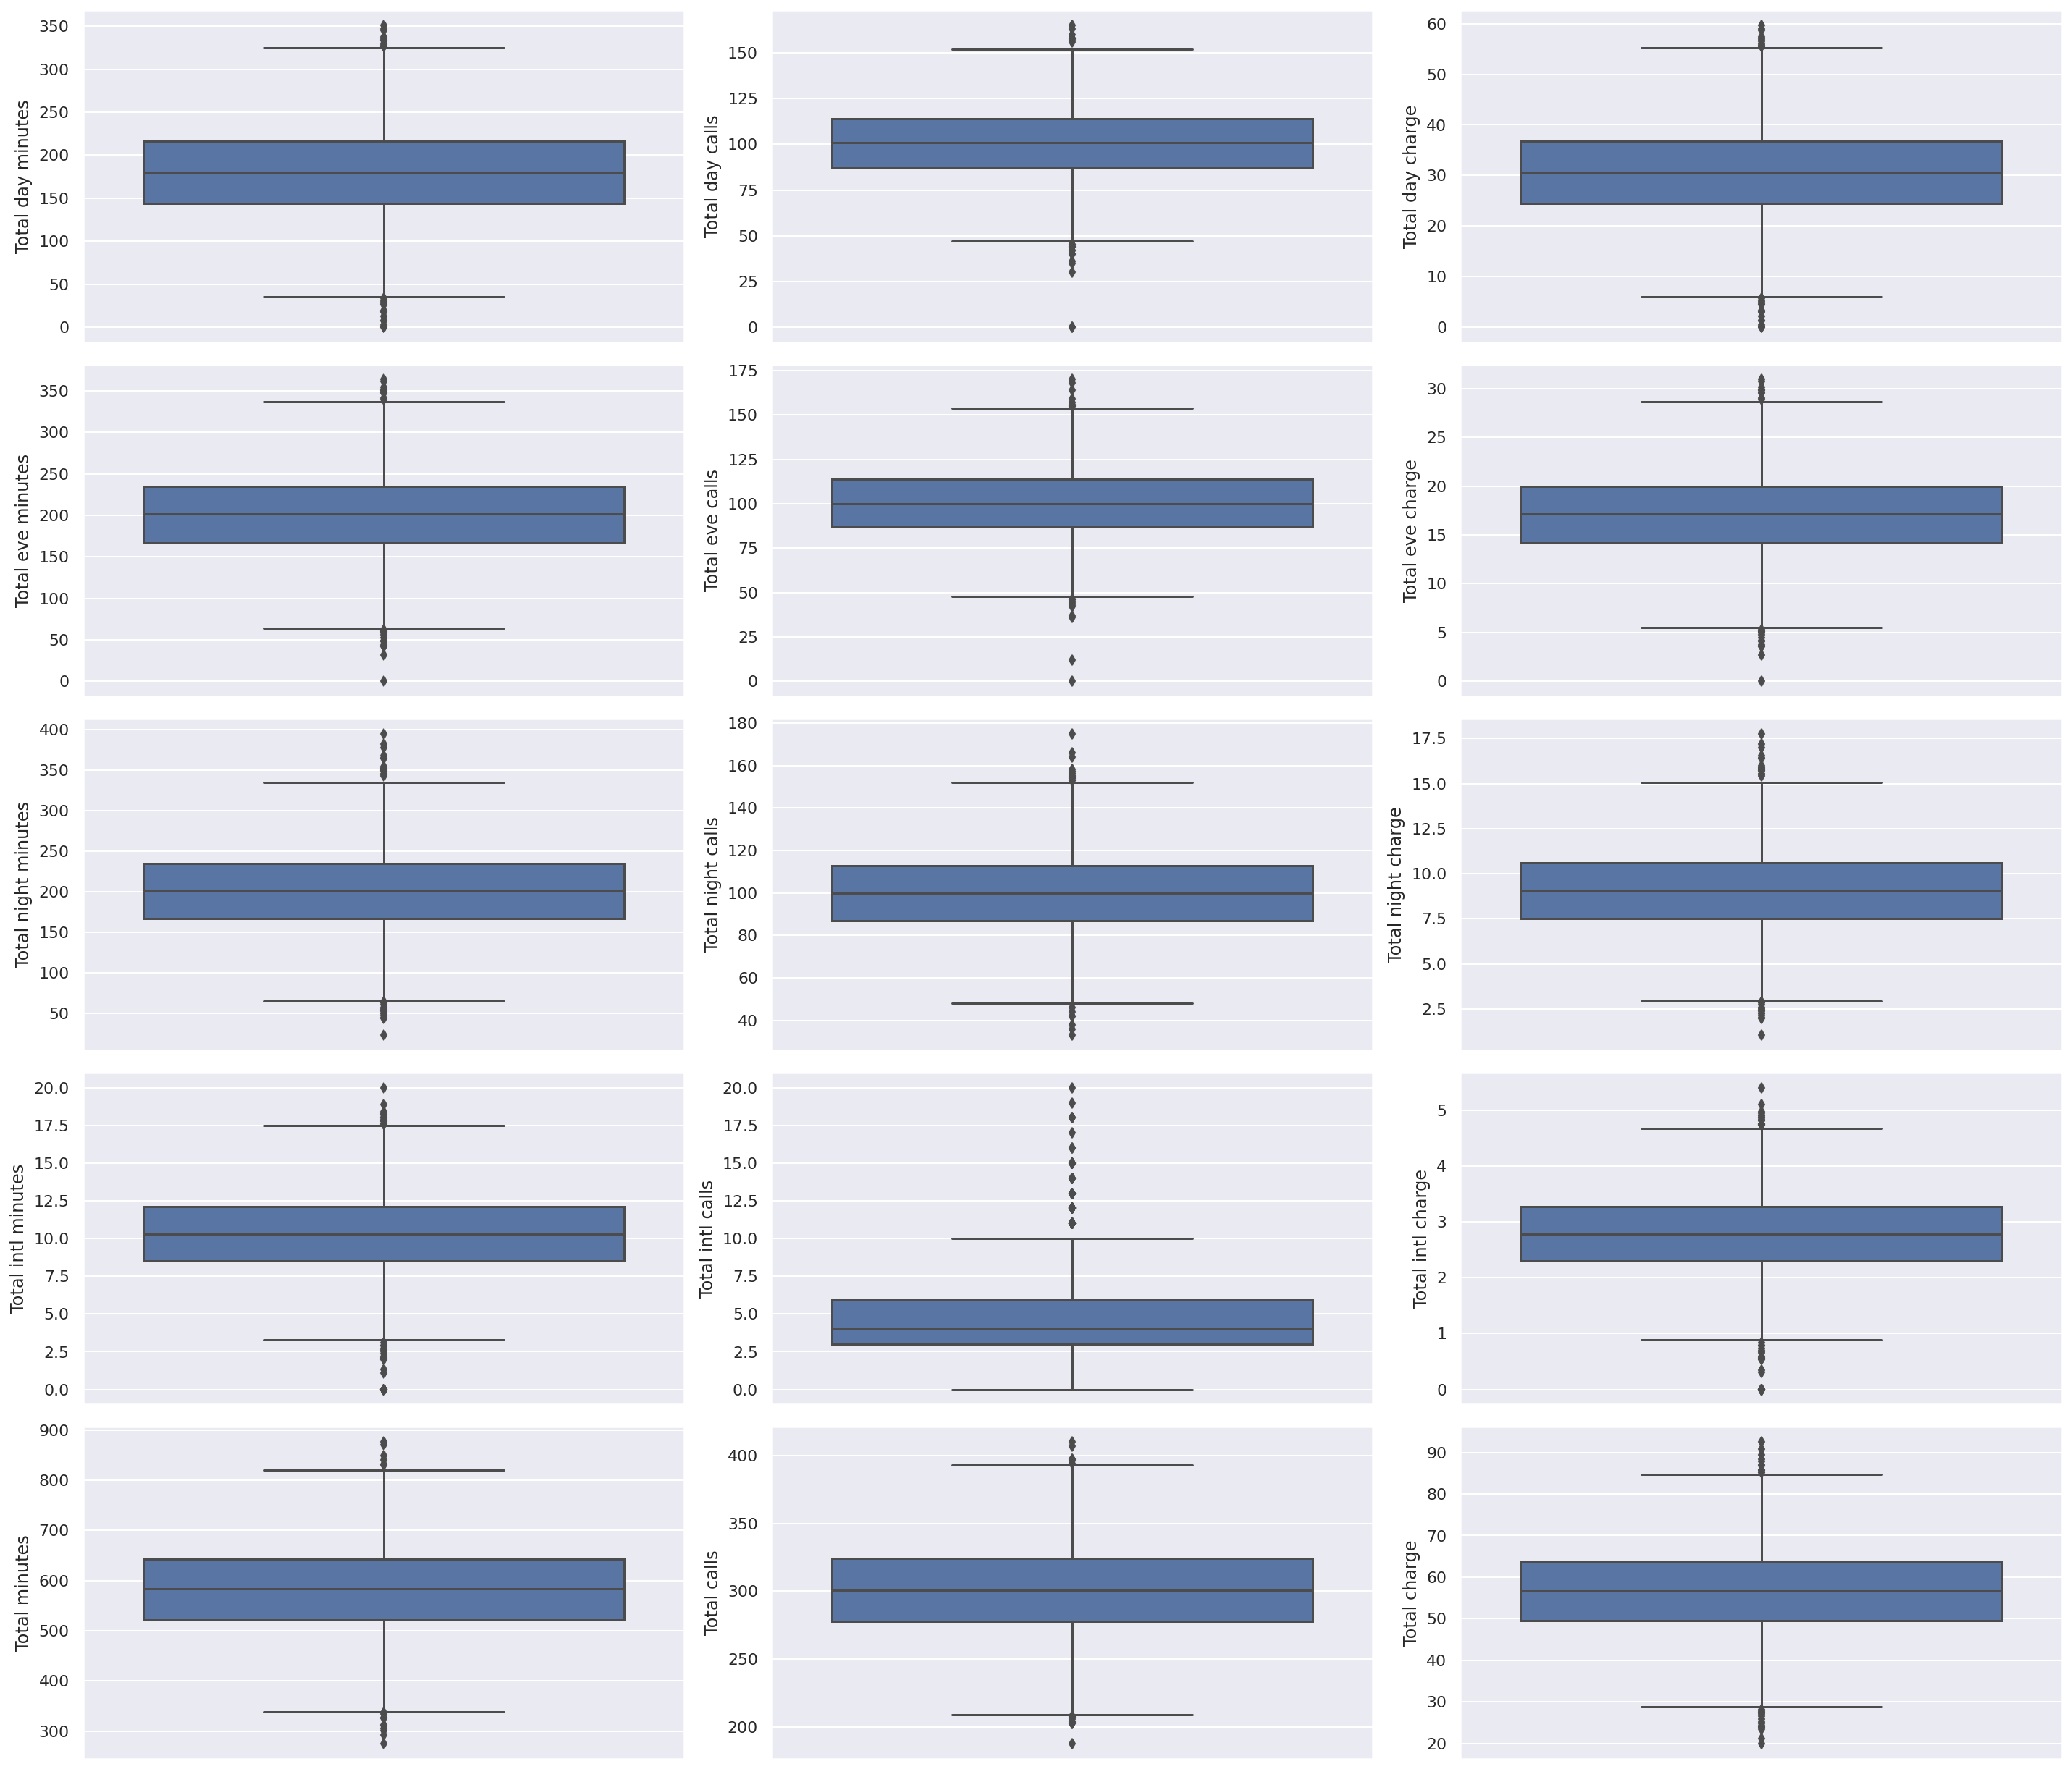

In [ ]:
plt.figure(figsize = (20,170))
l_row = 50
l_pos = 1
for col in num_var:
    plt.subplot(l_row, 3, l_pos)
    sns.boxplot(y = col, data = df)
    l_pos = l_pos + 1
plt.tight_layout()
plt.show()

from above visualization we can observe that all data we can see equal distribution and we cannot see any variation, only we can see variation in charges and international data


In [ ]:
# maximum, mean, minimum, and sum of Total day minutes, Total eve minutes, Total night minutes, Total intl minutes, and  Total minutes with respect to churn data
df_show = ['Total day minutes','Total eve minutes', 'Total night minutes','Total intl minutes', 'Total minutes',]
df.groupby(['Churn'])[df_show].agg([np.max, np.mean, np.min, np.sum])

Total day minutes                            Total eve minutes  \
                   amax        mean amin       sum              amax   
Churn                                                                  
False             315.6  175.175754  0.0  499250.9             361.8   
True              350.8  206.914079  0.0   99939.5             363.7   

                                  Total night minutes                    \
             mean  amin       sum                amax        mean  amin   
Churn                                                                     
False  199.043298   0.0  567273.4               395.0  200.133193  23.2   
True   212.410145  70.9  102594.1               354.9  205.231677  47.4   

                Total intl minutes                          Total minutes  \
            sum               amax       mean amin      sum          amax   
Churn                                                                       
False  570379.6               18.9  10.158877  0.0  28952.8         831.0   
True    99126.9               20.0  10.700000  2.0   5168.1         876.9   

                                     
             mean   amin        sum  
Churn                                
False  574.352246  275.2  1636903.9  
True   624.555901  311.7   301660.5

In [ ]:
# maximum, mean, minimum, and sum of Total day calls, Total eve calls, Total night calls, Total intl calls, and  Total calls with respect to churn data
columns_to_show = ['Total day calls','Total eve calls','Total night calls','Total intl calls','Total calls']
df.groupby(['Churn'])[columns_to_show].agg([np.max, np.mean, np.min,np.sum])

Total day calls                          Total eve calls              \
                 amax        mean amin     sum            amax        mean   
Churn                                                                        
False             163  100.283158    0  285807             170  100.038596   
True              165  101.335404    0   48945             168  100.561077   

                   Total night calls                           \
      amin     sum              amax        mean amin     sum   
Churn                                                           
False    0  285110               175  100.058246   33  285166   
True    48   48571               158  100.399586   49   48493   

      Total intl calls                       Total calls                   \
                  amax      mean amin    sum        amax        mean amin   
Churn                                                                       
False               19  4.532982    0  12919         410  300.380000  188   
True                20  4.163561    1   2011         407  302.296066  204   

               
          sum  
Churn          
False  856083  
True   146009

In [ ]:
# maximum, mean, minimum, and sum of Total day charge, Total eve charge, Total night charge, Total intl charge, and  Total charge with respect to churn data
columns_to_show = ['Total day charge','Total eve charge','Total night charge','Total intl charge','Total charge']
df.groupby(['Churn'])[columns_to_show].agg([np.max, np.mean, np.min, np.sum])

Total day charge                           Total eve charge             \
                  amax       mean amin       sum             amax       mean   
Churn                                                                          
False            53.65  29.780421  0.0  84874.20            30.75  16.918909   
True             59.64  35.175921  0.0  16989.97            30.91  18.054969   

                      Total night charge                            \
       amin       sum               amax      mean  amin       sum   
Churn                                                                
False  0.00  48218.89              17.77  9.006074  1.04  25667.31   
True   6.03   8720.55              15.97  9.235528  2.13   4460.76   

      Total intl charge                          Total charge             \
                   amax      mean  amin      sum         amax       mean   
Churn                                                                      
False               5.1  2.743404  0.00  7818.70        84.68  55.705404   
True                5.4  2.889545  0.54  1395.65        92.56  62.466418   

                         
        amin        sum  
Churn                    
False  19.98  158760.40  
True   21.09   30171.28

## from above three observations  we can see that similar distributions in minutes, calls, charge with respect to day, eveing, night, international, and total except the day minutes whice are quite less than other feature this caused by high charge rates in day calling


In [ ]:
## churn distributions of international and total minutes with respect to plans ##

In [ ]:
#What is the maximum length of international calls among loyal users (Churn == 0) who have an international plan?
print(f"maximum length of international calls among loyal users (Churn == 0) who have an international plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'Yes')]['Total intl minutes'].max()}\n")

# What is the sum of international calls among loyal users (Churn == 0) who have an international plan?
print(f"sum of international calls among loyal users (Churn == 0) who have an international plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'Yes')]['Total intl minutes'].sum()}\n")

# What is the sum of international calls among dis-loyal users (Churn == 1) who have an international plan?
print(f"sum of international calls among disloyal users (Churn == 1) who have an international plan is {df[(df['Churn'] == 1) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'Yes')]['Total intl minutes'].sum()}\n\n")

# What is the maximum length of voice calls among loyal users (Churn == 0) who have an Voice mail plan?
print(f"maximum length of voice calls among loyal users (Churn == 0) who have an Voice mail plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'Yes')&(df['International plan'] == 'No')]['Total minutes'].max()}\n")

# What is the sum of voice calls among loyal users (Churn == 0) who have an Voice mail plan?
print(f"sum of voice calls among loyal users (Churn == 0) who have an Voice mail plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'Yes')&(df['International plan'] == 'No')]['Total minutes'].sum()}\n")

# What is the sum of voice calls among dis loyal users (Churn == 1) who have an Voice mail plan?
print(f"sum of voice calls among loyal users (Churn == 1) who have an Voice mail plan is {df[(df['Churn'] == 1) & (df['Voice mail plan'] == 'Yes')&(df['International plan'] == 'No')]['Total minutes'].sum()}\n")




maximum length of international calls among loyal users (Churn == 0) who have an international plan is 13.0

sum of international calls among loyal users (Churn == 0) who have an international plan is 1255.2999999999997

sum of international calls among disloyal users (Churn == 1) who have an international plan is 1171.5


maximum length of voice calls among loyal users (Churn == 0) who have an Voice mail plan is 831.0

sum of voice calls among loyal users (Churn == 0) who have an Voice mail plan is 459029.9

sum of voice calls among loyal users (Churn == 1) who have an Voice mail plan is 24482.3



from above six obsrvation we can see the calls data with respect to plans of international and voice

we can observe the churn rate is higher in international calls which is 93% where as total calls od voice as  5 % churn rate 

In [ ]:
### churn distributions of international and total minutes with respect to non plans  ### 

In [ ]:
#What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?
print(f"maximum length of international calls among loyal users (Churn == 0) who have an international plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'No')]['Total intl minutes'].max()}\n")

# What is the sum of international calls among loyal users (Churn == 0) who do not have an international plan?
print(f"sum of international calls among loyal users (Churn == 0) who do not have  an international plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'No')]['Total intl minutes'].sum()}\n")

# What is the sum of international calls among dis-loyal users (Churn == 1) who do not have an international plan?
print(f"sum of international calls among disloyal users (Churn == 1) who do not have  an international plan is {df[(df['Churn'] == 1) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'No')]['Total intl minutes'].sum()}\n\n")

# What is the maximum length of voice calls among loyal users (Churn == 0) who do not have an Voice mail plan?
print(f"maximum length of voice calls among loyal users (Churn == 0) who do not have  an Voice mail plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'No')]['Total minutes'].max()}\n")

# What is the sum of voice calls among loyal users (Churn == 0) who do not have an Voice mail plan?
print(f"sum of voice calls among loyal users (Churn == 0) who do not have an Voice mail plan is {df[(df['Churn'] == 0) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'No')]['Total minutes'].sum()}\n")

# What is the sum of voice calls among dis loyal users (Churn == 1) who do not have an Voice mail plan?
print(f"sum of voice calls among loyal users (Churn == 1) who do not have  an Voice mail plan is {df[(df['Churn'] == 1) & (df['Voice mail plan'] == 'No')&(df['International plan'] == 'No')]['Total minutes'].sum()}\n")




maximum length of international calls among loyal users (Churn == 0) who have an international plan is 18.9

sum of international calls among loyal users (Churn == 0) who do not have  an international plan is 19155.8

sum of international calls among disloyal users (Churn == 1) who do not have  an international plan is 3105.0


maximum length of voice calls among loyal users (Churn == 0) who do not have  an Voice mail plan is 785.3

sum of voice calls among loyal users (Churn == 0) who do not have an Voice mail plan is 1069709.4

sum of voice calls among loyal users (Churn == 1) who do not have  an Voice mail plan is 195310.9



from above six observation we can see the calls data with respect to non plan of international and voice

we can observe the churn rate is higher in normal calls which is 18% where as international as  14% churn rate 

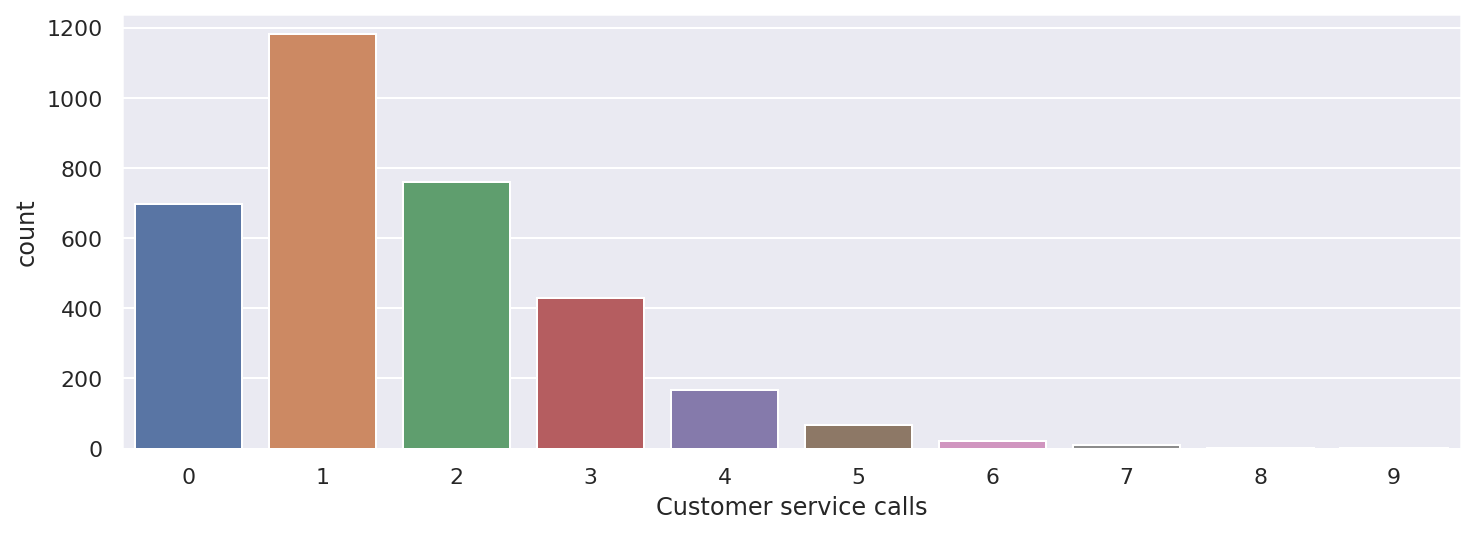

In [ ]:
# customers service calls
axes = plt.subplots(figsize=(12, 4))

sns.countplot(x="Customer service calls", data=df)

Customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
dtype: int64
Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
False                   605  1059  672  385   90  26   8  4  1  0  2850
True                     92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


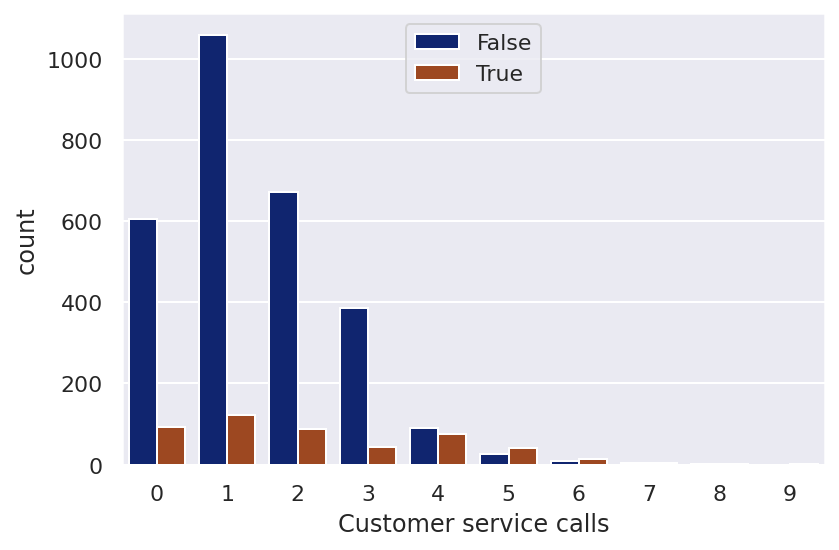

In [ ]:
print(df.value_counts("Customer service calls"))
print(pd.crosstab(df['Churn'], df["Customer service calls"], margins=True))
sns.countplot(df["Customer service calls"], hue=df["Churn"], palette = "dark")
plt.legend()
plt.tight_layout()
plt.show()

Customer with 4 and above customer service calls have high churn rate

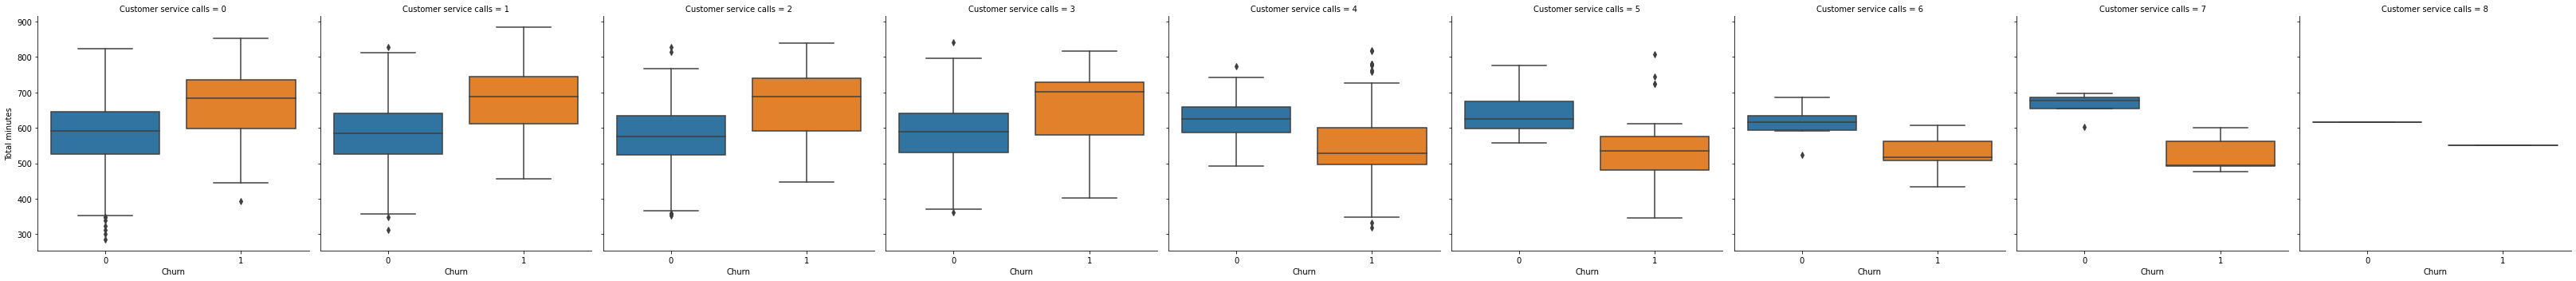

In [ ]:
sns.catplot(x='Churn', y='Total minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 9], kind="box")

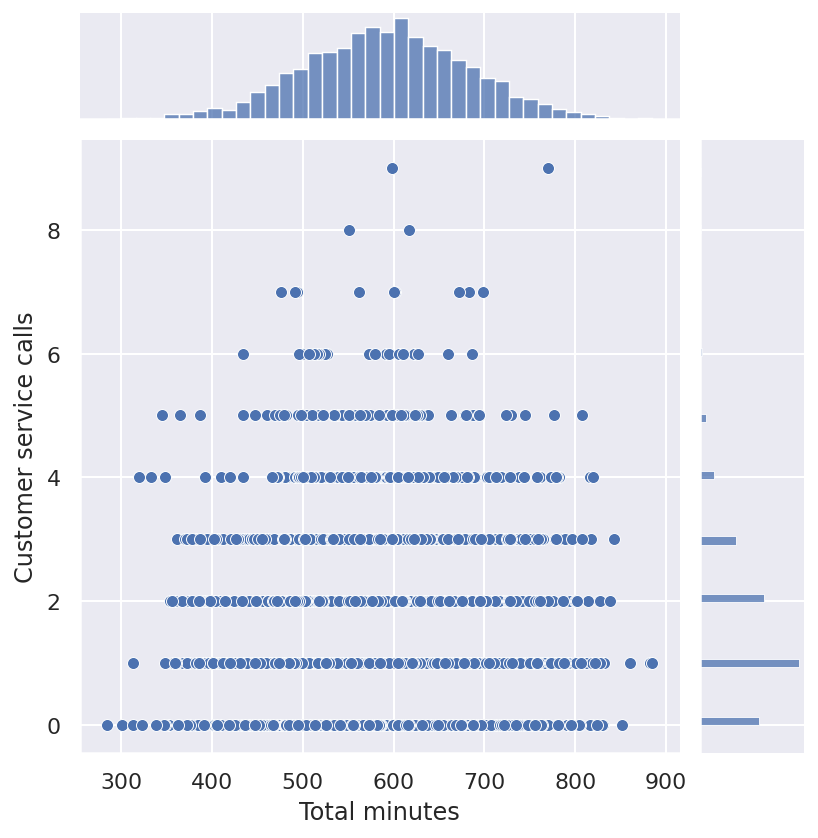

In [ ]:
#custumer service scatter plot with respect to total minutes 
sns.jointplot(x='Total minutes', y='Customer service calls',data=df, kind='scatter')

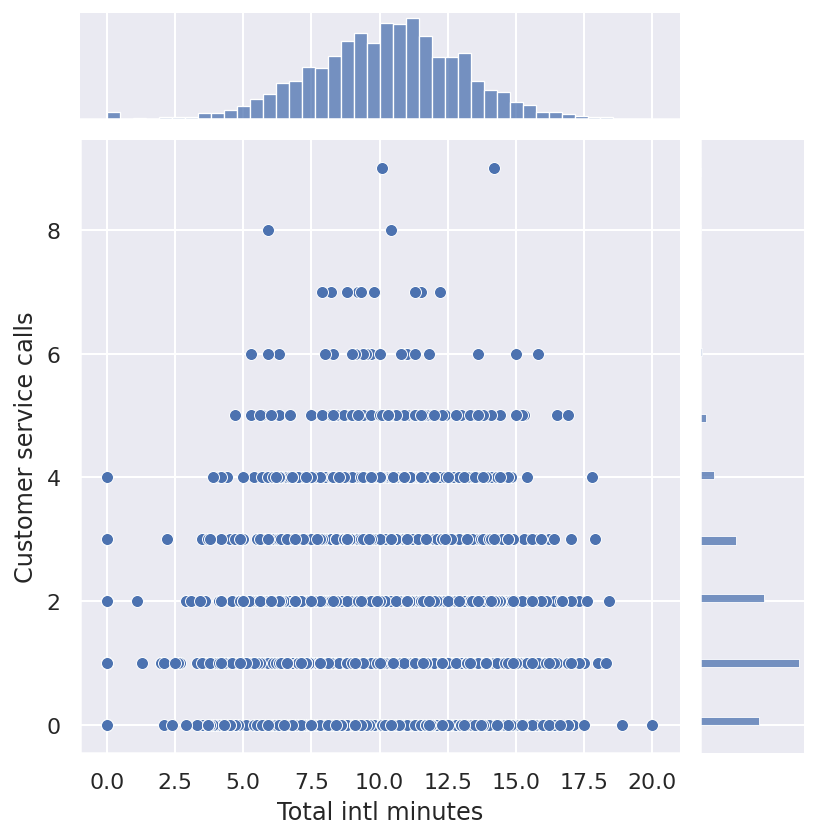

In [ ]:
#custumer service scatter plot with respect to total international minutes 
sns.jointplot(x='Total intl minutes', y='Customer service calls',data=df, kind='scatter')

From above two graph wa can see the calls beyound the four tends to decrease or scatter the minutes with respect to total minutes and international minutes, 

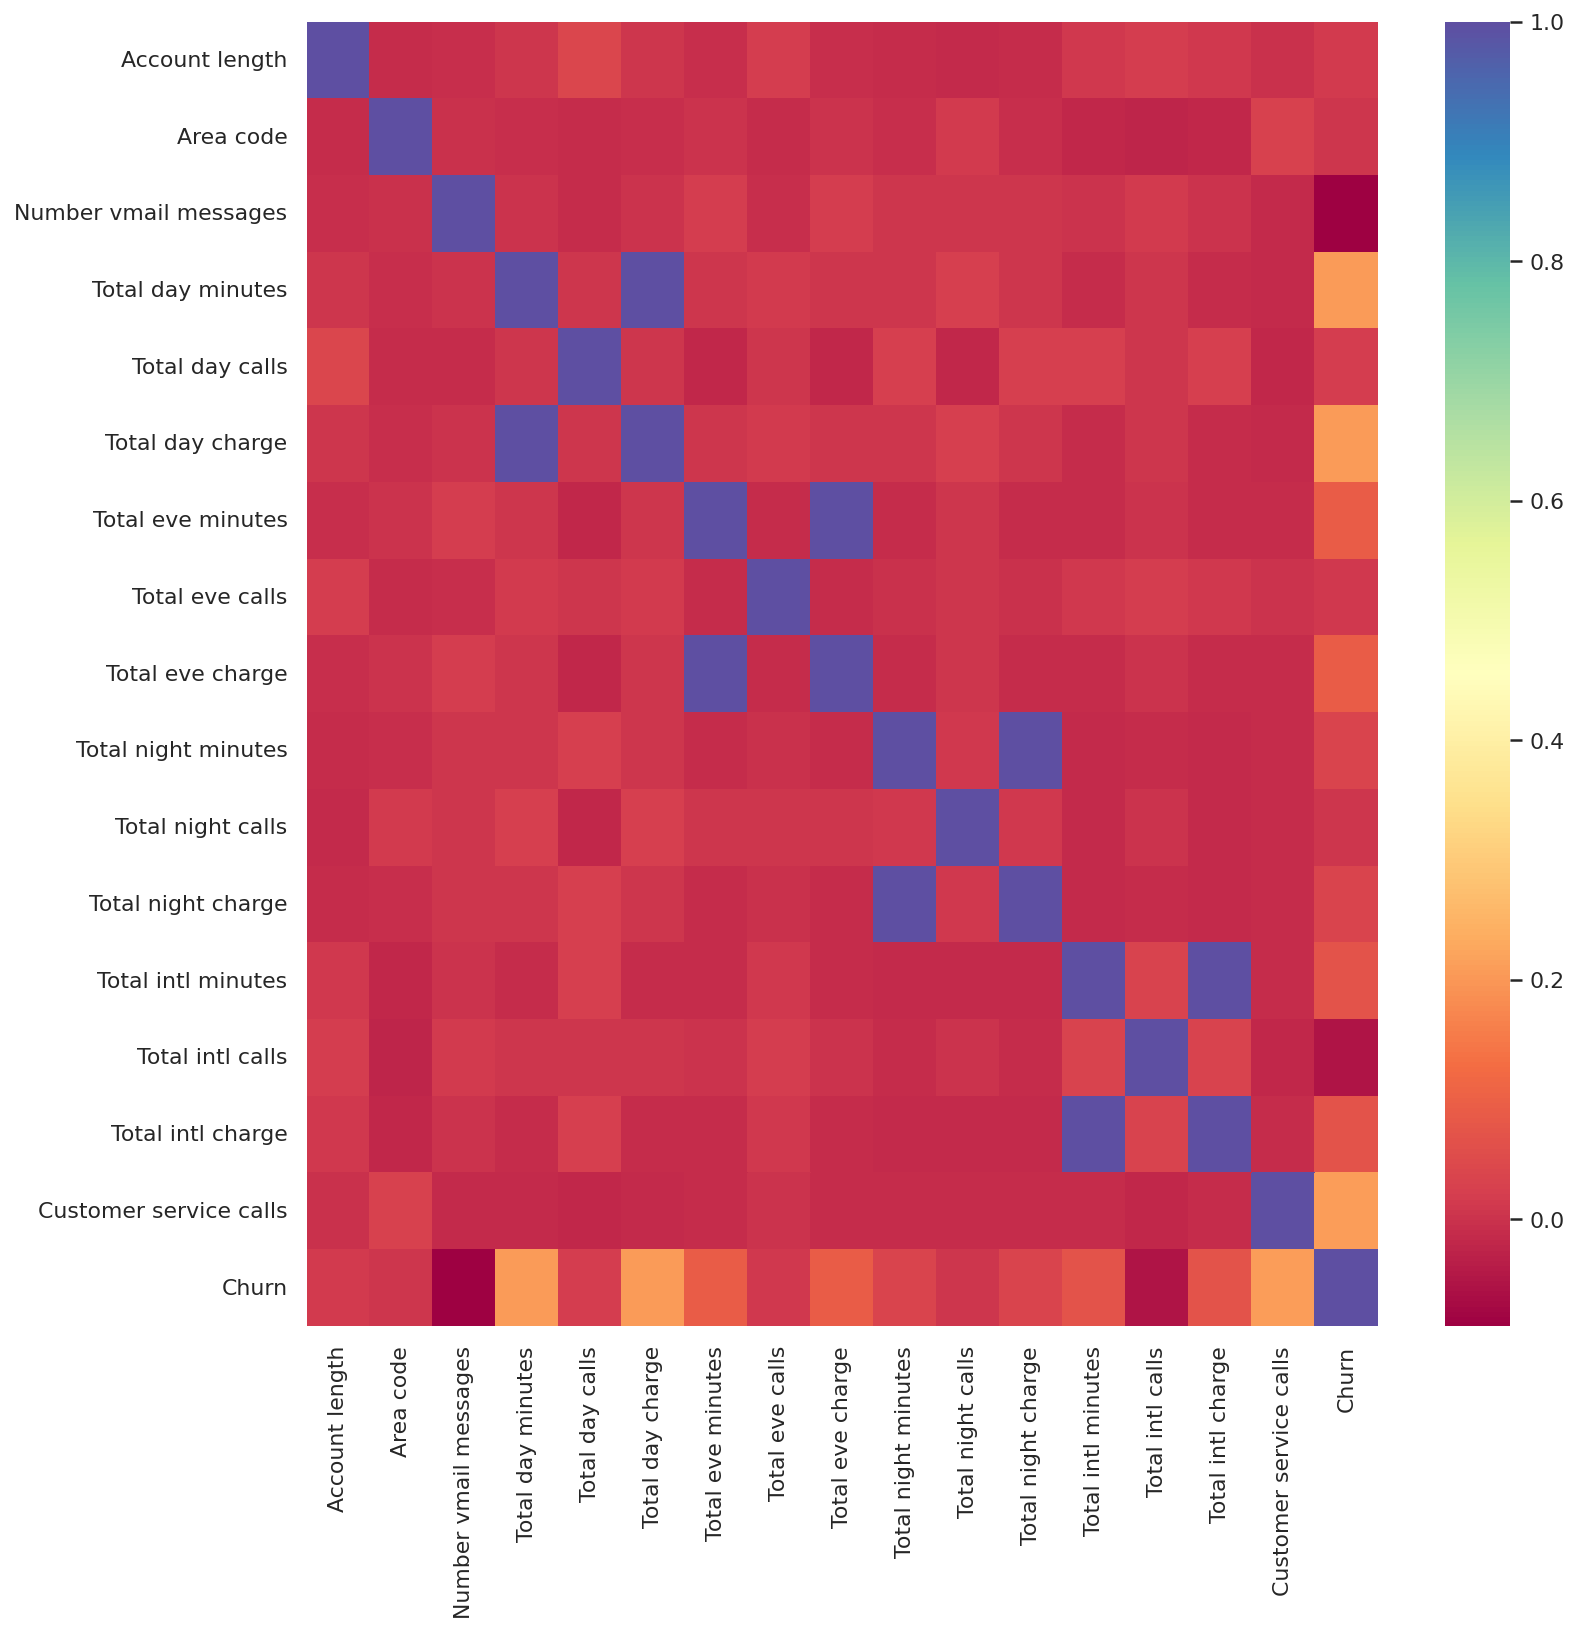

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='Spectral')

## From above the Heatmap we can see that linear dependency between minutes and charge with respect to day, evening, international, and night.

In [ ]:
# additional process:

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dataprep.eda import create_report

DataPrep Report
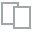
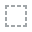
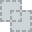
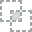
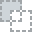
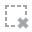
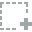
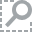
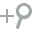
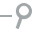
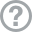
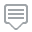
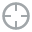
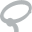
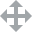
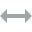
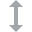
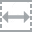
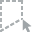
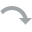
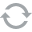
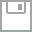
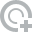
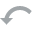
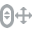
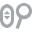
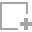
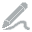
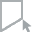
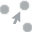
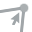
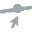

In [ ]:
create_report(df)